In [1]:
from glob import glob
from py_eddy_tracker.observations.observation import EddiesObservations
from py_eddy_tracker.observations.tracking import TrackEddiesObservations
from matplotlib import pyplot as plt
import numpy as np
import pylook

In [2]:
N = 366 * 8

In [3]:
lavd_filenames = glob('data/eddies_med_lavd_allsat_dt2018_err070_forward/*/*.nc')
lavd_filenames.sort()
len(lavd_filenames)

2929

In [4]:
anticyclonic_ssh_filenames = glob('data/eddies_med_adt_allsat_dt2018_err070_filt0500_order01/*/A*.nc')
cyclonic_ssh_filenames = glob('data/eddies_med_adt_allsat_dt2018_err070_filt0500_order01/*/C*.nc')
anticyclonic_ssh_filenames.sort()
cyclonic_ssh_filenames.sort()
len(anticyclonic_ssh_filenames), len(cyclonic_ssh_filenames)

(9629, 9629)

In [5]:
%%time
lavd_eddies = EddiesObservations.concatenate([EddiesObservations.load_file(f) for f in lavd_filenames[:N]])

CPU times: user 35 s, sys: 294 ms, total: 35.2 s
Wall time: 35.4 s


In [6]:
print(lavd_eddies)

    | 85047 observations from 15706 to 18633 (2928 days, ~29 obs/day)
    |   Speed area      : 0.01 Mkm²/day
    |   Effective area  : 0.04 Mkm²/day
    ----Distribution in Amplitude:
    |   Amplitude bounds (cm)        0.00      1.00      2.00      3.00      4.00      5.00     10.00    500.00
    |   Percent of eddies         :     100.00      0.00      0.00      0.00      0.00      0.00      0.00
    ----Distribution in Radius:
    |   Speed radius (km)            0.00     15.00     30.00     45.00     60.00     75.00    100.00    200.00   2000.00
    |   Percent of eddies         :      74.44     25.56      0.00      0.00      0.00      0.00      0.00      0.00
    |   Effective radius (km)        0.00     15.00     30.00     45.00     60.00     75.00    100.00    200.00   2000.00
    |   Percent of eddies         :      21.17     63.62     13.00      2.10      0.10      0.00      0.00      0.00
    ----Distribution in Latitude
        Latitude bounds            -90.00    -60.00  

/home/toto/dev/py-eddy-tracker/src/py_eddy_tracker/observations/observation.py:277: RuntimeWarning: invalid value encountered in true_divide
  v /= hist_numba(x, bins=bins)[0]


In [7]:
%%time
a_eddies = EddiesObservations.concatenate([EddiesObservations.load_file(f) for f in anticyclonic_ssh_filenames[:N]])
c_eddies = EddiesObservations.concatenate([EddiesObservations.load_file(f) for f in cyclonic_ssh_filenames[:N]])

CPU times: user 1min 8s, sys: 663 ms, total: 1min 8s
Wall time: 1min 8s


In [8]:
print(a_eddies)

    | 168780 observations from 15706 to 18633 (2928 days, ~58 obs/day)
    |   Speed area      : 0.17 Mkm²/day
    |   Effective area  : 0.24 Mkm²/day
    ----Distribution in Amplitude:
    |   Amplitude bounds (cm)        0.00      1.00      2.00      3.00      4.00      5.00     10.00    500.00
    |   Percent of eddies         :      34.66     24.34     12.51      7.96      4.89     11.06      4.58
    ----Distribution in Radius:
    |   Speed radius (km)            0.00     15.00     30.00     45.00     60.00     75.00    100.00    200.00   2000.00
    |   Percent of eddies         :       1.89     56.59     28.55      9.22      2.62      1.06      0.08      0.00
    |   Effective radius (km)        0.00     15.00     30.00     45.00     60.00     75.00    100.00    200.00   2000.00
    |   Percent of eddies         :       1.82     48.40     24.83     13.72      6.53      4.19      0.51      0.00
    ----Distribution in Latitude
        Latitude bounds            -90.00    -60.00 

In [9]:
print(c_eddies)

    | 211253 observations from 15706 to 18633 (2928 days, ~72 obs/day)
    |   Speed area      : 0.22 Mkm²/day
    |   Effective area  : 0.28 Mkm²/day
    ----Distribution in Amplitude:
    |   Amplitude bounds (cm)        0.00      1.00      2.00      3.00      4.00      5.00     10.00    500.00
    |   Percent of eddies         :      37.75     27.46     14.08      8.28      4.41      7.28      0.74
    ----Distribution in Radius:
    |   Speed radius (km)            0.00     15.00     30.00     45.00     60.00     75.00    100.00    200.00   2000.00
    |   Percent of eddies         :       1.89     56.50     26.80      9.35      3.47      1.84      0.15      0.00
    |   Effective radius (km)        0.00     15.00     30.00     45.00     60.00     75.00    100.00    200.00   2000.00
    |   Percent of eddies         :       1.80     49.25     26.28     13.11      5.80      3.35      0.41      0.00
    ----Distribution in Latitude
        Latitude bounds            -90.00    -60.00 

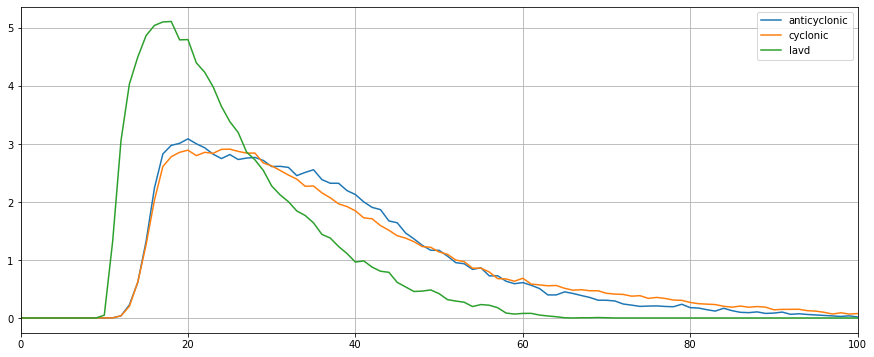

In [10]:
kw_hist = dict(varname='radius_s', x='radius_s', bins=np.arange(0,200,1) * 1e3, percent=True)
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
ax.plot(a_eddies.hist(**kw_hist), label='anticyclonic')
ax.plot(c_eddies.hist(**kw_hist), label='cyclonic')
kw_hist['x'] = 'radius_e'
kw_hist['varname'] = 'radius_e'
ax.plot(lavd_eddies.hist(**kw_hist), label='lavd')
ax.grid(), ax.set_xlim(0, 100)
_ = ax.legend()

In [11]:
kw_match = dict(cmin=.01, minimal_area=True)
kw_match = dict(cmin=.05)

In [12]:
%%time
i_a, i_a_lavd, s_a = list(), list(), list()
a_eddies_ = a_eddies.copy()
a_eddies_.contour_lon_e[:] = a_eddies_.contour_lon_s[:]
a_eddies_.contour_lat_e[:] = a_eddies_.contour_lat_s[:]
for i_self, i_other, b0, b1 in a_eddies_.align_on(lavd_eddies):
    i_a_, i_a_lavd_, s = a_eddies_.match(lavd_eddies, i_self, i_other, **kw_match)
    i_a.append(i_a_ + i_self.start), i_a_lavd.append(i_a_lavd_  + i_other.start), s_a.append(s)
i_a, i_a_lavd, s_a = np.concatenate(i_a), np.concatenate(i_a_lavd), np.concatenate(s_a) * 100

CPU times: user 3.13 s, sys: 124 ms, total: 3.25 s
Wall time: 3.27 s


In [13]:
%%time
i_c, i_c_lavd, s_c = list(), list(), list()
c_eddies_ = c_eddies.copy()
c_eddies_.contour_lon_e[:] = c_eddies_.contour_lon_s[:]
c_eddies_.contour_lat_e[:] = c_eddies_.contour_lat_s[:]
for i_self, i_other, b0, b1 in c_eddies_.align_on(lavd_eddies):
    i_c_, i_c_lavd_, s = c_eddies_.match(lavd_eddies, i_self, i_other, **kw_match)
    i_c.append(i_c_ + i_self.start), i_c_lavd.append(i_c_lavd_ + i_other.start), s_c.append(s)
i_c, i_c_lavd, s_c = np.concatenate(i_c), np.concatenate(i_c_lavd), np.concatenate(s_c) * 100

CPU times: user 3.09 s, sys: 99.9 ms, total: 3.18 s
Wall time: 3.19 s


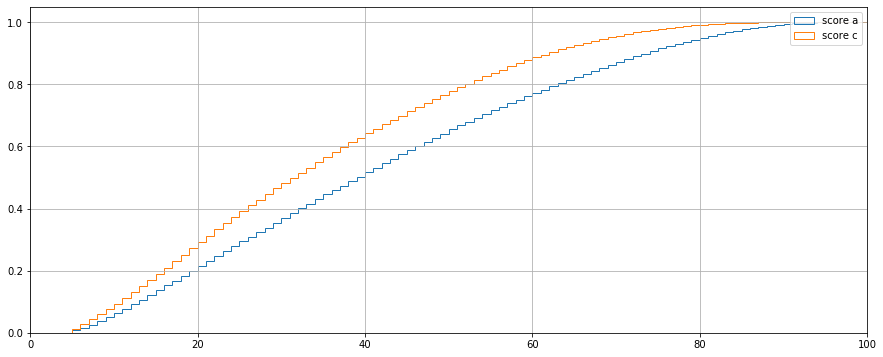

In [14]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
kw = dict(bins=np.arange(101), histtype='step', density=True, cumulative=True)
ax.hist(s_a, label='score a', **kw)
ax.hist(s_c, label='score c', **kw)
ax.grid()
ax.legend()
_ = ax.set_xlim(0,100)

In [15]:
kw_grid = dict(bins=((-6,38,.05), (30, 47, .05)))
kw_display = dict(name='count', vmax=750, vmin=0, cmap='terrain_r')

CPU times: user 2.36 s, sys: 56.1 ms, total: 2.42 s
Wall time: 2.42 s


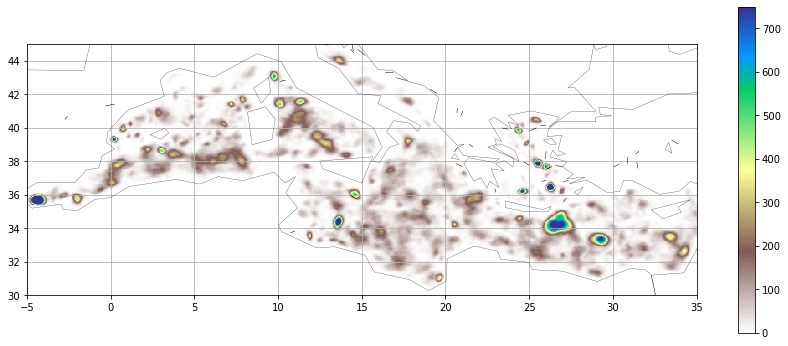

In [16]:
%%time
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111, projection='plat_carre')
ax.set_xlim(-5,35), ax.set_ylim(30,45)
m = lavd_eddies.grid_count(**kw_grid).display(ax, **kw_display)
plt.colorbar(m)
_= ax.grid()

CPU times: user 6 s, sys: 12.1 ms, total: 6.02 s
Wall time: 6 s


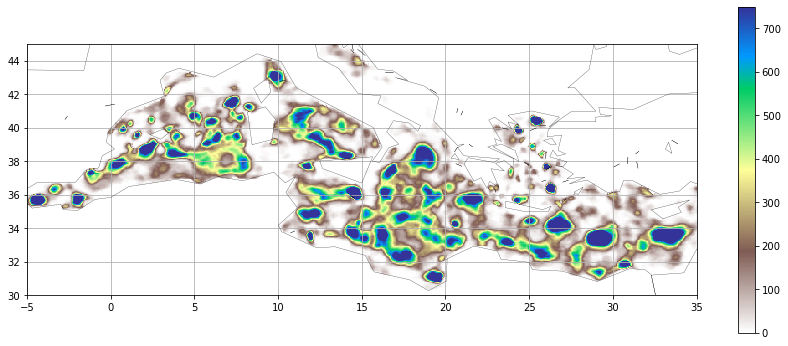

In [17]:
%%time
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111, projection='plat_carre')
ax.set_xlim(-5,35), ax.set_ylim(30,45)
m = a_eddies.grid_count(**kw_grid, intern=True).display(ax, **kw_display)
plt.colorbar(m)
_= ax.grid()

CPU times: user 7.95 s, sys: 24.1 ms, total: 7.97 s
Wall time: 7.96 s


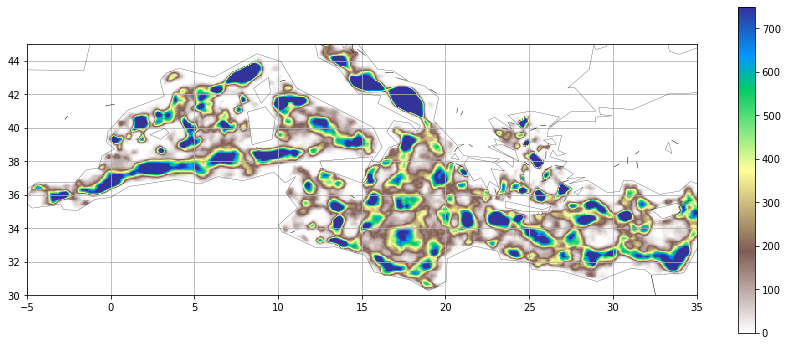

In [18]:
%%time
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111, projection='plat_carre')
ax.set_xlim(-5,35), ax.set_ylim(30,45)
m = c_eddies.grid_count(**kw_grid, intern=True).display(ax, **kw_display)
plt.colorbar(m)
_= ax.grid()

CPU times: user 1.76 s, sys: 7.98 ms, total: 1.77 s
Wall time: 1.77 s


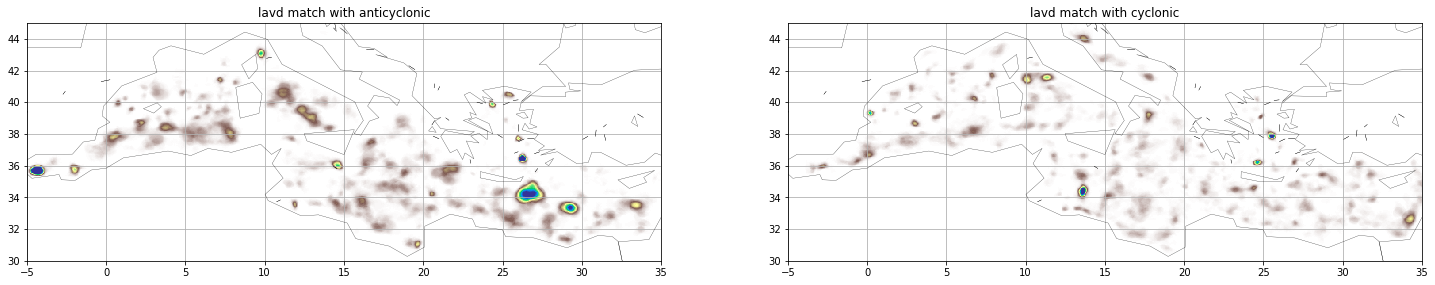

In [19]:
%%time
fig = plt.figure(figsize=(25,6))
ax = fig.add_subplot(121, projection='plat_carre')
ax.set_xlim(-5,35), ax.set_ylim(30,45), ax.grid(), ax.set_title('lavd match with anticyclonic')
m = lavd_eddies.grid_count(filter=i_a_lavd, **kw_grid).display(ax, **kw_display)
ax = fig.add_subplot(122, projection='plat_carre')
ax.set_xlim(-5,35), ax.set_ylim(30,45), ax.grid(), ax.set_title('lavd match with cyclonic')
m = lavd_eddies.grid_count(filter=i_c_lavd, **kw_grid).display(ax, **kw_display)

CPU times: user 3 s, sys: 12.1 ms, total: 3.02 s
Wall time: 3.01 s


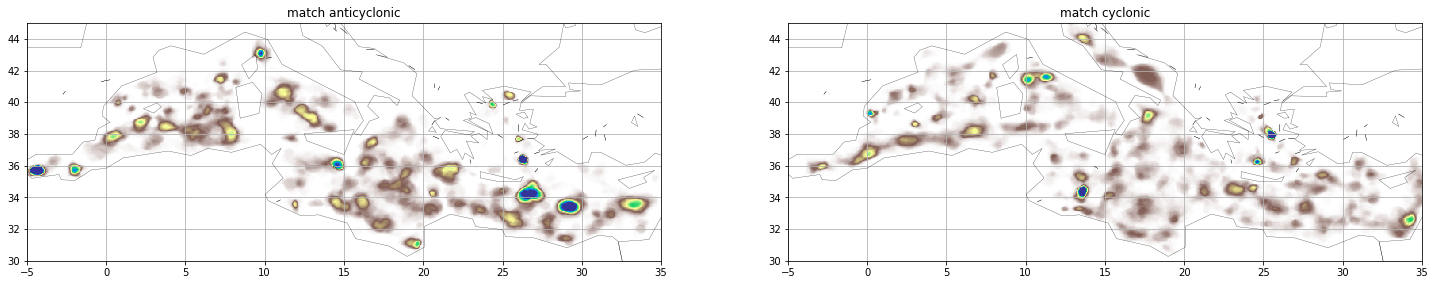

In [20]:
%%time
fig = plt.figure(figsize=(25,6))
ax = fig.add_subplot(121, projection='plat_carre')
ax.set_xlim(-5,35), ax.set_ylim(30,45), ax.grid(), ax.set_title('match anticyclonic')
m = a_eddies.grid_count(filter=i_a, intern=True, **kw_grid).display(ax, **kw_display)
ax = fig.add_subplot(122, projection='plat_carre')
ax.set_xlim(-5,35), ax.set_ylim(30,45), ax.grid(), ax.set_title('match cyclonic')
m = c_eddies.grid_count(filter=i_c, intern=True, **kw_grid).display(ax, **kw_display)

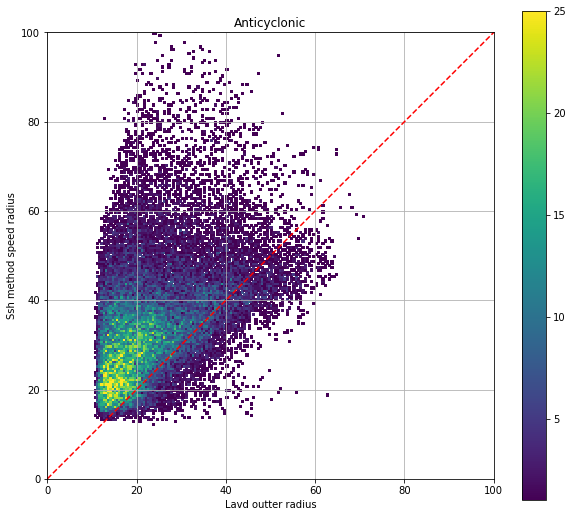

In [21]:
fig = plt.figure(figsize=(10,9))
ax = fig.add_subplot(111)
z, x, y = np.histogram2d(lavd_eddies.radius_e[i_a_lavd] / 1e3, a_eddies.radius_s[i_a] / 1e3, bins=np.arange(0,150,.5))
z[z == 0] = np.nan
m = ax.pcolormesh(x,y,z.T, vmax=25)
ax.plot((0,1e3), (0,1e3), 'r--')
ax.set_xlim(0,100), ax.set_ylim(0,100)
ax.set_xlabel("Lavd outter radius")
ax.set_ylabel("Ssh method speed radius")
plt.colorbar(m)
_ = ax.grid(), ax.set_aspect('equal'), ax.set_title('Anticyclonic')

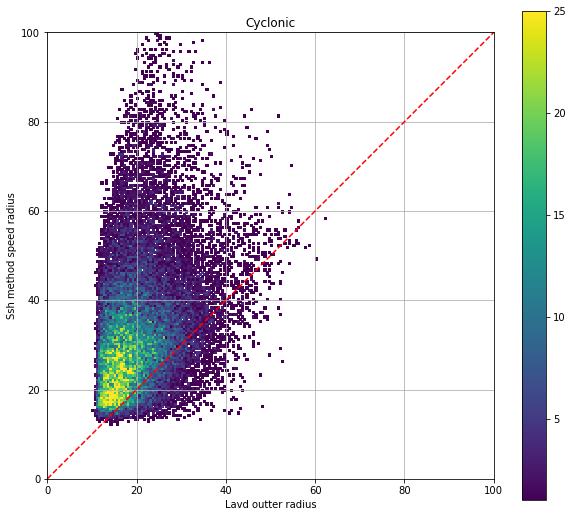

In [22]:
fig = plt.figure(figsize=(10,9))
ax = fig.add_subplot(111)
z, x, y = np.histogram2d(lavd_eddies.radius_e[i_c_lavd] / 1e3, c_eddies.radius_s[i_c] / 1e3, bins=np.arange(0,150,.5))
z[z == 0] = np.nan
m = ax.pcolormesh(x,y,z.T, vmax=25)
ax.plot((0,1e3), (0,1e3), 'r--')
ax.set_xlim(0,100), ax.set_ylim(0,100)
ax.set_xlabel("Lavd outter radius")
ax.set_ylabel("Ssh method speed radius")
plt.colorbar(m)
_ = ax.grid(), ax.set_aspect('equal'), ax.set_title('Cyclonic')